<a href="https://colab.research.google.com/github/johnjdailey/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.



### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
# 1) Replicate the lesson code

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#use the 'magic' symbol (%) to specify some non-python code (i.e. affect the
#underlying jupyter kernel)
%matplotlib inline
'''
That line is only for jupyer notebooks, and allows plot figures to show up in your notebook.
if you are using another editor, you'll use:
 plt.show()"
at the end of all your plotting commands to have the figure pop up in another window
'''

'\nThat line is only for jupyer notebooks, and allows plot figures to show up in your notebook.\nif you are using another editor, you\'ll use:\n plt.show()"\nat the end of all your plotting commands to have the figure pop up in another window\n'

In [0]:
#Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast')
#"fast" is actually the default style, so you don't necessarily have to set it.

In [6]:
# List of other available plot styles you can use instead of "fast".
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

In [7]:
# Part 1. The Pandas built-in visualization tool. (Simple, quick & dirty)
# for more complex use matplotlib, seaborn, or plotly
# Under the hood, pands plot graphs with the matplotlib library

#Read in the titatanic dataset
# url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [8]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.
df['cabin_class'] = df['Pclass'].map({1:'first', 2: 'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


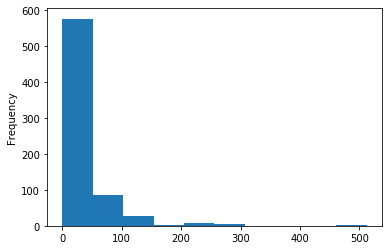

In [9]:
# Fare is a continuous variable, so we can display it with a histogram.
df['Fare'].plot(kind='hist');

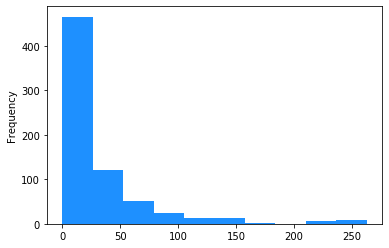

In [10]:
# Remove two extreme outliers
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='dodgerblue');

In [11]:
# A coninuous variable can be converted to a categorical var using binnning.
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high', 'vhigh']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

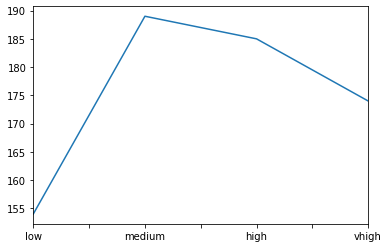

In [12]:
# sometimes it's important to specify the range of your y-axes to get more accurate results. 'lim'='limits'
myresults.plot();
# myresults.plot(ylim=(0,200));

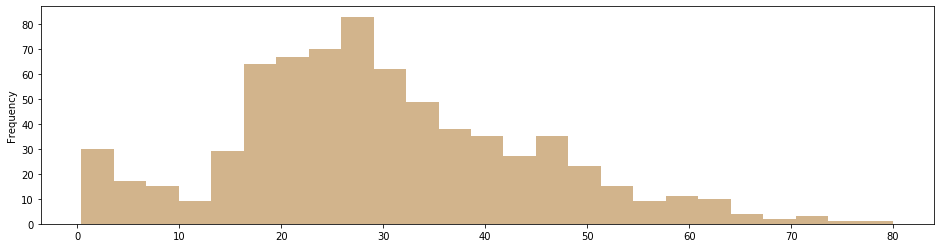

In [13]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

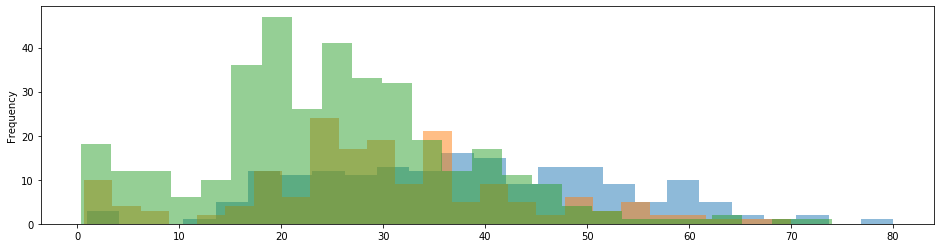

In [14]:
# Stacked Histogram of continuous variable, broken out by categorical variable.
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5);

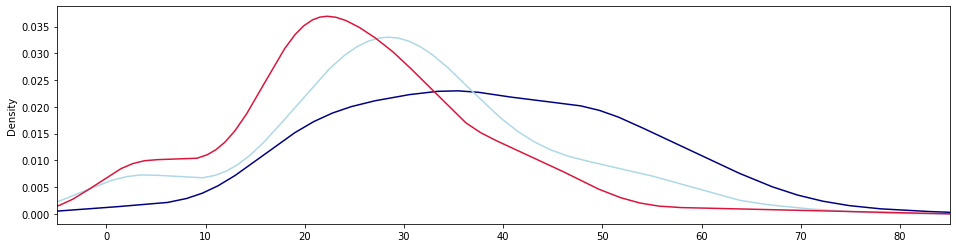

In [15]:
# But this is actually easier to read using a Kernel Density Estimate (KDE). Note the use of 'xlim'.
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='navy')
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='lightblue')
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='crimson');

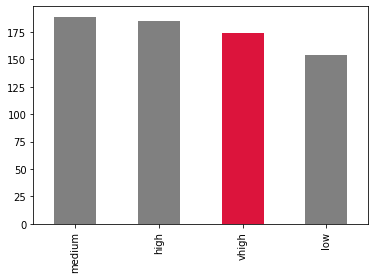

In [16]:
#Display a Single Categorical Variable

#Bar chart. Use colors to make a particular value 'pop'!
df['fare_groups'].value_counts().plot(kind='bar', color=['gray', 'gray', 'crimson', 'gray']);

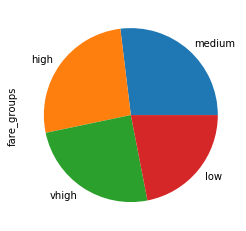

In [17]:
# Pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [18]:
# Compare twoo categorical variables (using crosstab)
cab_death = pd.crosstab(df['cabin_class'],df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


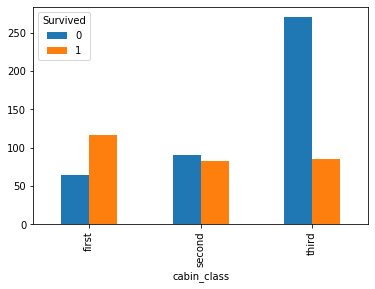

In [19]:
# Make that into a bar chart.
cab_death.plot(kind='bar');

In [20]:
# Crosstab with column percents.
cab_death1 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


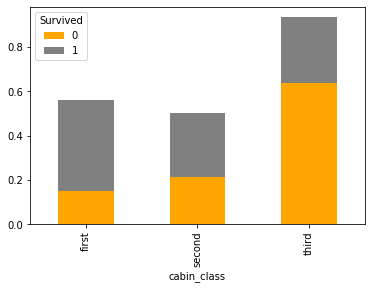

In [21]:
# make a stacked bar chart, for easy comparison of two categorical variables.
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [22]:
# Crosstab with column percents.
cab_death2 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


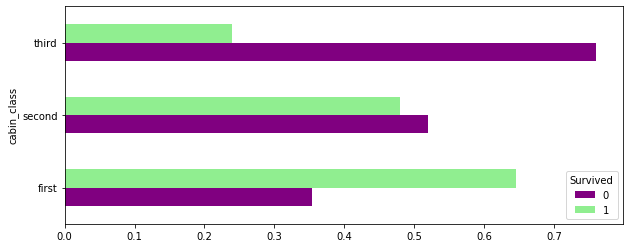

In [23]:
# A paired barchart for comparison of two categorical variables. Note the use of 'barh'.
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

In [24]:
# Let's look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [25]:
# Now explore that conitnuous variable broken out by a categorical (i.e., categorical) variable.
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

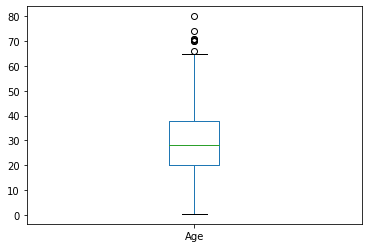

In [26]:
# To visualize a single continuous variable, you can just use '.plot' with 'kind=box'
df['Age'].plot(kind='box');

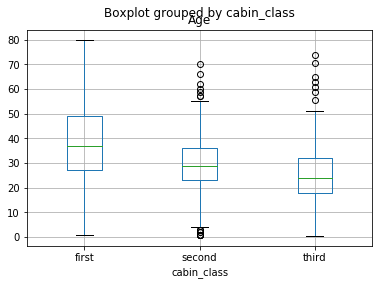

In [27]:
# But to break out a continuous variable by a categorical variable, use '.boxplot'
df.boxplot(column='Age', by='cabin_class');

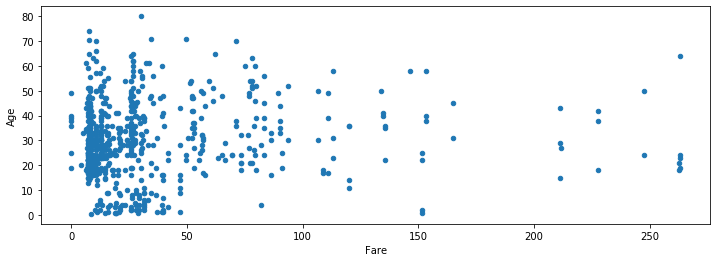

In [28]:
#Comapre two or three coninuous variables

# Two continuous variables: age by fare
df.plot(kind = 'scatter', x='Fare', y='Age', figsize=(12,4));

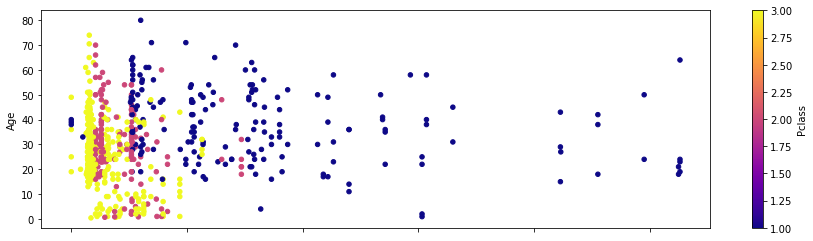

In [29]:
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

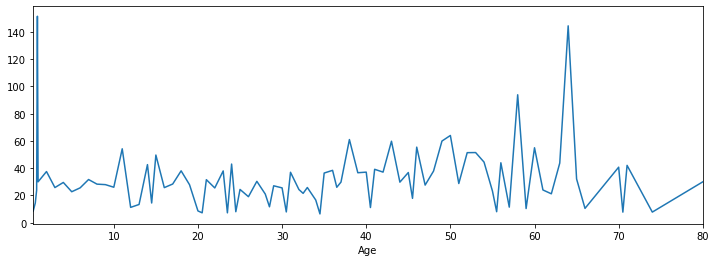

In [30]:
# Use a line plot to examine two continuous variables (often time)

# line chart: age by fare
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

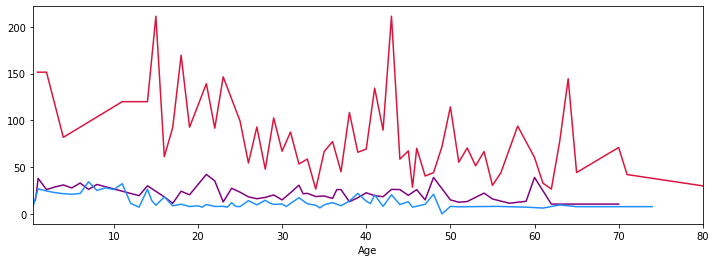

In [31]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through whe values.
for x in [1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

In [32]:
# Compare multiple continuous variables

# Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


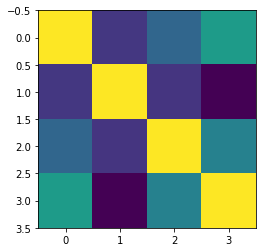

In [33]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

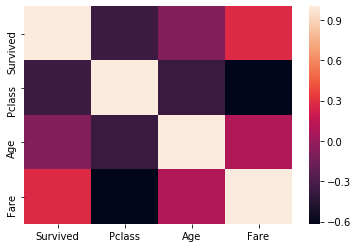

In [34]:
# But this actually is easier and better looking if you use seaborn code.

# More about seaborn further down.
sns.heatmap(corr_matrix);

In [0]:
# Intro to matplotlib

# Very simple example using two numpy arrays. You can also use most lists,
# but most likely you'll be passing numpy arrays or pandas columns (which essentially
# also behave llike arrays).
# ** The data we want to plot **

import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [36]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [37]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

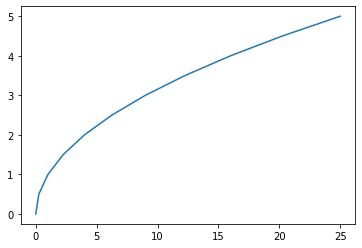

In [38]:
# Basic matplotlib commands

# a very simple plot, to get started. Notice that NO PANDAS is required!
plt.plot(y,x);

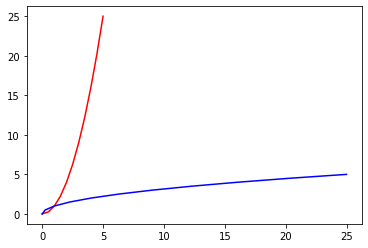

In [39]:
# You can have two 'plt' plots together (and let's add some color).
plt.plot(x, y, 'r')
plt.plot(y, x, 'b');

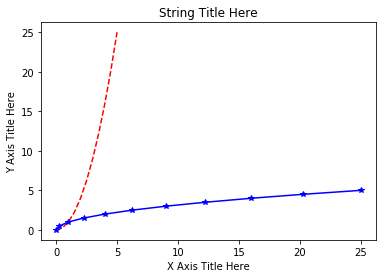

In [40]:
# Now add some labels, plus a little texture.
plt.plot(x, y, 'r--')
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

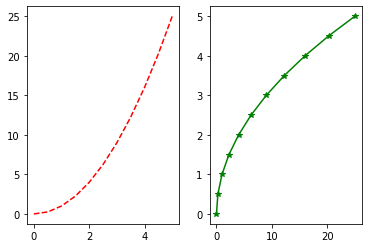

In [41]:
# Creating Multiplots on Same Canvas

# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

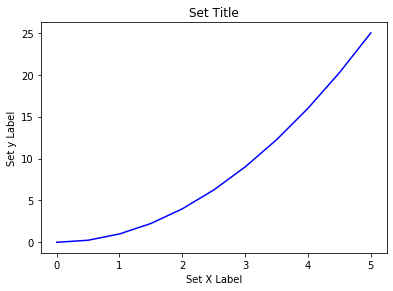

In [42]:
# Matplotlib Object Oriented Method
# plt.Figure is like a single container tha contains all the objects representing
# axes, graphics, text, and labels. The axes (an instance of the class plt.Axes)
# is what we see above: a bounding box with ticks and labels, which will eventually
# contain the plot elements that make up our visualization. We'll commonly use the
# variable name fig to refer to a figure instance, and ax to refer to an axes instance
# or group of axes instances. Once we have created an axes, we can use the ax.plot
# function to plot some data.
# https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html


# The .figure() method
#To begin we create a figure instance. Then we can add axes to that figure:

# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title');

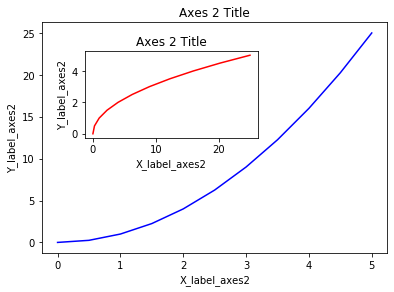

In [43]:
# Code is a little more complicated, but the advantage is that we now have full 
# control of where the plot axes are placed, and we can easily add more than one
# axes to the figure:

# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figue Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

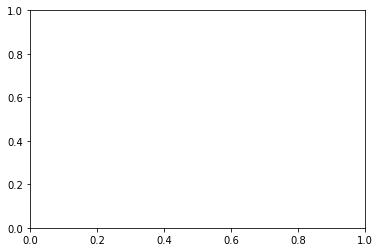

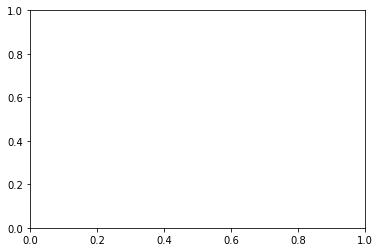

In [44]:
# The subplots() method
# The plt.subplots() object will act as a more automatic axis manager. It is
# somewhat more commong than using .figure()
# plt.subplots() is a function that returns a tuple containing a figure and axes
# object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the
# varuables fig and ax. Having fig is useful if you want to change figure_level
# attributes or save the figure as an image file later (eg. with fig.savefig('yourfilename.png')).
# You certainly don't have to use the returned figure object but many people do use it later so
# it's common to see. Also, all axes objects (the objects that have plotting methods).
# have a parent figure object anyway, thus:

fig, ax = plt.subplots()

# is more concise than this:

fig = plt.figure()
ax = fig.add_subplot(111)

https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

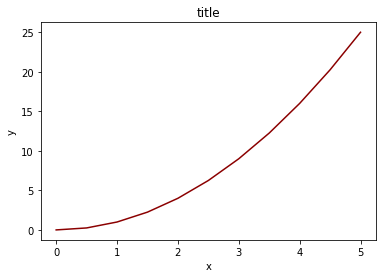

In [45]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1) # The default is '(1, 1)' so you don't actually have to specifiy this.

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots()
object:

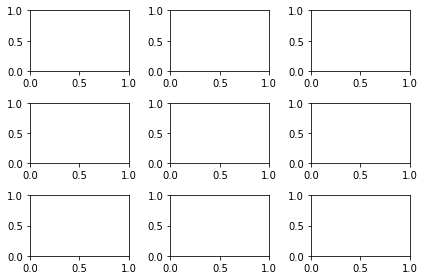

In [46]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=3, ncols=3) # the parameterlabels 'nrows' and 'ncols' are optional.

fig
plt.tight_layout() # more about '.tight_layout()' below.

In [47]:
# Axes is an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfd1b28a90>,
      dtype=object)

In [48]:
# We can iterate through this array:
for ax in axes:
  ax.plot(x, y, 'b')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('title')

  # Display the figure object
  fig

  # Weird how this doesn't work and I copied it from the lecture notes
  # Recopying the notes has taken me 4 hours this afternoon and I'm still not done
  # I will continue to practice on my typing WPM but I need to jump ahead for now.

AttributeError: ignored

In [50]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [0]:
display(example)

In [51]:
# https://fivethirtyeight.com/features/how-baby-boomers-get-high/

from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=575'
example = Image(url=url, width=400)

display(example)

In [52]:
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

['tableau-colorblind10', 'seaborn-muted', 'seaborn', 'dark_background', 'grayscale']


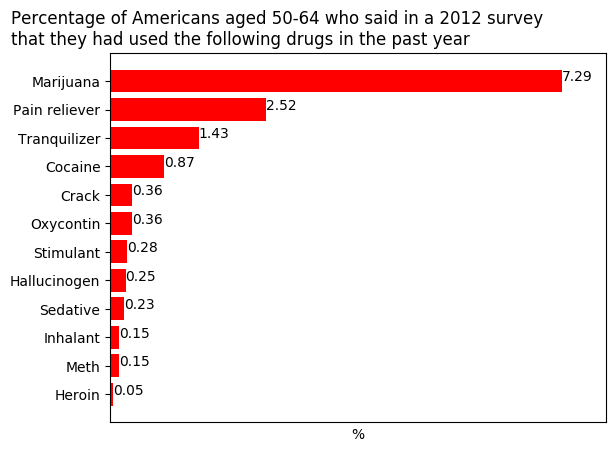

In [58]:
#plt.style.use('fivethirtyeight')
plt.rcdefaults()
fig, ax = plt.subplots()

ax.set_title('Percentage of Americans aged 50-64 who said in a 2012 survey \nthat they had used the following drugs in the past year', loc='left', x=-.2)

# Figure background color
fig.patch.set(facecolor="white")
# Axes background color
ax.set(facecolor="white")

druguse = pd.Series([0.05, 0.15, 0.15, 0.23, 0.25,
               0.28, 0.36, 0.36, 0.87, 1.43, 2.52, 7.29], 
                  index=range(1,13))

drugs = ('Heroin', 'Meth', 'Inhalant', 'Sedative', 'Hallucinogen', 'Stimulant', 'Oxycontin', 'Crack', 'Cocaine', 'Tranquilizer', 'Pain reliever', 'Marijuana')
y_pos = np.arange(len(drugs))
x = [0.05, 0.15, 0.15, 0.23, 0.25, 0.28, 0.36, 0.36, 0.87, 1.43, 2.52, 7.29]

for i, v in enumerate(x):
    ax.text(v, i, str(v), color='black', fontweight='normal')

ax.barh(y_pos, x, align='center', color="red")
ax.set_yticks(y_pos)
ax.set_yticklabels(drugs)

ax.set_xticks(range(1,9))
ax.set_xticks([])
#ax.invert_yaxis()
#ax.invert_xaxis()
ax.set_xlabel('%');

# ax.annotate(str(j),xy=(i,j+1)) #I wanted to try to use this to add % to the end of the bar values. 
# Please let me know if you know how to do this, I searched for more than 20 minutes.

#https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
# This documentation helped me a lot to finish this assignment and I am very thankful for that. 
# There are so many variables and tools to be used in this matplotlib.

In [0]:
df = pd.read_csv('https://github.com/fivethirtyeight/data/blob/master/drug-use-by-age/drug-use-by-age.csv', error_bad_lines=False)

df

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here